### V1 process data - merge into one file.

In [15]:
import os
import glob
import pandas as pd
from pandas.errors import EmptyDataError

# Paths
RAW_BASE    = r"E:\study\meteoroData_raw"
CLEANED_DIR = r"E:\study\meteoroData_clean"
os.makedirs(CLEANED_DIR, exist_ok=True)

# List of states to process
states = ["vic", "nsw", "qld"]

# Container for all DataFrames
all_dfs = []

# Full list of 11 column names from the raw CSV
colnames_11 = [
    "station",            # 0: station identifier
    "date",               # 1: date (DD/MM/YYYY)
    "evap_0000_2400",     # 2: evaporation 0000–2400
    "rainfall_0900_0900", # 3: rainfall 0900–0900
    "evap_0900_0900",     # 4: evaporation 0900–0900
    "max_temp",           # 5: maximum temperature (°C)
    "min_temp",           # 6: minimum temperature (°C)
    "max_humid",          # 7: maximum relative humidity (%)
    "min_humid",          # 8: minimum relative humidity (%)
    "wind_speed",         # 9: wind speed (m/s)
    "solar"               # 10: solar exposure (MJ/m²)
]

for state in states:
    folder = os.path.join(RAW_BASE, state)
    pattern = os.path.join(folder, "*.csv")

    for fpath in glob.glob(pattern):
        # Skip zero-byte files
        if os.path.getsize(fpath) == 0:
            print(f"[Skip] Empty file: {fpath}")
            continue

        # Read CSV, skipping the first 13 lines of header/notes
        try:
            df = pd.read_csv(fpath, skiprows=13, header=None, encoding="utf-8")
        except EmptyDataError:
            print(f"[Skip] No data: {fpath}")
            continue

        # Validate column count and assign names
        ncol = df.shape[1]
        if ncol == 11:
            df.columns = colnames_11
        elif ncol == 10:
            # Some files may lack the 'solar' column
            df.columns = colnames_11[:-1]
        else:
            print(f"[Skip] Unexpected column count ({ncol}): {fpath}")
            continue

        # Convert date to ISO format YYYY-MM-DD
        df["date"] = pd.to_datetime(df["date"], dayfirst=True).dt.strftime("%Y-%m-%d")
        # Add a state column
        df["state"] = state.upper()

        # Keep only the 8 required columns and rename them
        df = df[[
            "date", "state", "station",
            "max_temp", "min_temp",
            "max_humid", "min_humid",
            "wind_speed"
        ]]
        df.rename(columns={
            "max_temp":  "max_Temperature_C",
            "min_temp":  "min_Temperature_C",
            "max_humid": "max_Humidity_pct",
            "min_humid": "min_Humidity_pct",
            "wind_speed":"wind_speed_m_s"
        }, inplace=True)

        all_dfs.append(df)
        print(f"✔ Processed: {os.path.basename(fpath)}")

# Merge and write out
if all_dfs:
    big_df = pd.concat(all_dfs, ignore_index=True)
    out_f = os.path.join(CLEANED_DIR, "all_states_weather.csv")
    big_df.to_csv(out_f, index=False, encoding="utf-8")
    print(f"\n✅ Done! {len(big_df)} records written to: {out_f}")
else:
    print("⚠️ No valid data processed. Please check the raw files.")

✔ Processed: avalon_airport-202211.csv
✔ Processed: avalon_airport-202212.csv
✔ Processed: bairnsdale_airport-202205.csv
✔ Processed: ballarat_aerodrome-202205.csv
✔ Processed: cape_nelson_lighthouse-202205.csv
✔ Processed: cape_otway_lighthouse-202205.csv
✔ Processed: casterton-202205.csv
✔ Processed: cerberus-202205.csv
✔ Processed: charlton-202205.csv
✔ Processed: coldstream-202205.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\coldstream_comparison-202205.csv
✔ Processed: combienbar-202205.csv
✔ Processed: dartmoor-202205.csv
✔ Processed: dartmoor-202206.csv
✔ Processed: avalon_airport-202301.csv
✔ Processed: avalon_airport-202302.csv
✔ Processed: avalon_airport-202303.csv
✔ Processed: avalon_airport-202304.csv
✔ Processed: avalon_airport-202305.csv
✔ Processed: avalon_airport-202306.csv
✔ Processed: avalon_airport-202307.csv
✔ Processed: avalon_airport-202308.csv
✔ Processed: avalon_airport-202309.csv
✔ Processed: avalon_airport-202310.csv
✔ Processed: avalon_airport-202311.c

✔ Processed: cape_nelson_lighthouse-202212.csv
✔ Processed: cape_nelson_lighthouse-202301.csv
✔ Processed: cape_nelson_lighthouse-202302.csv
✔ Processed: cape_nelson_lighthouse-202303.csv
✔ Processed: cape_nelson_lighthouse-202304.csv
✔ Processed: cape_nelson_lighthouse-202305.csv
✔ Processed: cape_nelson_lighthouse-202306.csv
✔ Processed: cape_nelson_lighthouse-202307.csv
✔ Processed: cape_nelson_lighthouse-202308.csv
✔ Processed: cape_nelson_lighthouse-202309.csv
✔ Processed: cape_nelson_lighthouse-202310.csv
✔ Processed: cape_nelson_lighthouse-202311.csv
✔ Processed: cape_nelson_lighthouse-202312.csv
✔ Processed: cape_nelson_lighthouse-202401.csv
✔ Processed: cape_nelson_lighthouse-202402.csv
✔ Processed: cape_nelson_lighthouse-202403.csv
✔ Processed: cape_nelson_lighthouse-202404.csv
✔ Processed: cape_nelson_lighthouse-202405.csv
✔ Processed: cape_nelson_lighthouse-202406.csv
✔ Processed: cape_nelson_lighthouse-202407.csv
✔ Processed: cape_nelson_lighthouse-202408.csv
✔ Processed: 

✔ Processed: colac_(mount_gellibrand)-202412.csv
✔ Processed: colac_(mount_gellibrand)-202501.csv
✔ Processed: colac_(mount_gellibrand)-202502.csv
✔ Processed: colac_(mount_gellibrand)-202503.csv
✔ Processed: colac_(mount_gellibrand)-202504.csv
✔ Processed: coldstream-202206.csv
✔ Processed: coldstream-202207.csv
✔ Processed: coldstream-202208.csv
✔ Processed: coldstream-202209.csv
✔ Processed: coldstream-202210.csv
✔ Processed: coldstream-202211.csv
✔ Processed: coldstream-202212.csv
✔ Processed: coldstream-202301.csv
✔ Processed: coldstream-202302.csv
✔ Processed: coldstream-202303.csv
✔ Processed: coldstream-202304.csv
✔ Processed: coldstream-202305.csv
✔ Processed: coldstream-202306.csv
✔ Processed: coldstream-202307.csv
✔ Processed: coldstream-202308.csv
✔ Processed: coldstream-202309.csv
✔ Processed: coldstream-202310.csv
✔ Processed: coldstream-202311.csv
✔ Processed: coldstream-202312.csv
✔ Processed: coldstream-202401.csv
✔ Processed: coldstream-202402.csv
✔ Processed: coldstr

✔ Processed: dinner_plain_(mount_hotham_airport)-202207.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202208.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202209.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202210.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202211.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202212.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202301.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202302.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202303.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202304.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202305.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202306.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202307.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202308.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202309.csv
✔ Processed: dinner_plain_(mount_hotham_airport)-202310.csv
✔ Processed: dinner_plain_(mount_hotham_

✔ Processed: frankston_(ballam_park)-202302.csv
✔ Processed: frankston_(ballam_park)-202303.csv
✔ Processed: frankston_(ballam_park)-202304.csv
✔ Processed: frankston_(ballam_park)-202305.csv
✔ Processed: frankston_(ballam_park)-202306.csv
✔ Processed: frankston_(ballam_park)-202307.csv
✔ Processed: frankston_(ballam_park)-202308.csv
✔ Processed: frankston_(ballam_park)-202309.csv
✔ Processed: frankston_(ballam_park)-202310.csv
✔ Processed: frankston_(ballam_park)-202311.csv
✔ Processed: frankston_(ballam_park)-202312.csv
✔ Processed: frankston_(ballam_park)-202401.csv
✔ Processed: frankston_(ballam_park)-202402.csv
✔ Processed: frankston_(ballam_park)-202403.csv
✔ Processed: frankston_(ballam_park)-202404.csv
✔ Processed: frankston_(ballam_park)-202405.csv
✔ Processed: frankston_(ballam_park)-202406.csv
✔ Processed: frankston_(ballam_park)-202407.csv
✔ Processed: frankston_(ballam_park)-202408.csv
✔ Processed: frankston_(ballam_park)-202409.csv
✔ Processed: frankston_(ballam_park)-202

✔ Processed: grampians_(mount_william)-202208.csv
✔ Processed: grampians_(mount_william)-202209.csv
✔ Processed: grampians_(mount_william)-202210.csv
✔ Processed: grampians_(mount_william)-202211.csv
✔ Processed: grampians_(mount_william)-202212.csv
✔ Processed: grampians_(mount_william)-202301.csv
✔ Processed: grampians_(mount_william)-202302.csv
✔ Processed: grampians_(mount_william)-202303.csv
✔ Processed: grampians_(mount_william)-202304.csv
✔ Processed: grampians_(mount_william)-202305.csv
✔ Processed: grampians_(mount_william)-202306.csv
✔ Processed: grampians_(mount_william)-202307.csv
✔ Processed: grampians_(mount_william)-202308.csv
✔ Processed: grampians_(mount_william)-202309.csv
✔ Processed: grampians_(mount_william)-202310.csv
✔ Processed: grampians_(mount_william)-202311.csv
✔ Processed: grampians_(mount_william)-202312.csv
✔ Processed: grampians_(mount_william)-202401.csv
✔ Processed: grampians_(mount_william)-202402.csv
✔ Processed: grampians_(mount_william)-202403.csv


✔ Processed: hunters_hill-202310.csv
✔ Processed: hunters_hill-202311.csv
✔ Processed: hunters_hill-202312.csv
✔ Processed: hunters_hill-202401.csv
✔ Processed: hunters_hill-202402.csv
✔ Processed: hunters_hill-202403.csv
✔ Processed: hunters_hill-202404.csv
✔ Processed: hunters_hill-202405.csv
✔ Processed: hunters_hill-202406.csv
✔ Processed: hunters_hill-202407.csv
✔ Processed: hunters_hill-202408.csv
✔ Processed: hunters_hill-202409.csv
✔ Processed: hunters_hill-202410.csv
✔ Processed: hunters_hill-202411.csv
✔ Processed: hunters_hill-202412.csv
✔ Processed: hunters_hill-202501.csv
✔ Processed: hunters_hill-202502.csv
✔ Processed: hunters_hill-202503.csv
✔ Processed: hunters_hill-202504.csv
✔ Processed: kanagulk-202205.csv
✔ Processed: kanagulk-202206.csv
✔ Processed: kanagulk-202207.csv
✔ Processed: kanagulk-202208.csv
✔ Processed: kanagulk-202209.csv
✔ Processed: kanagulk-202210.csv
✔ Processed: kanagulk-202211.csv
✔ Processed: kanagulk-202212.csv
✔ Processed: kanagulk-202301.csv


✔ Processed: laverton_raaf-202410.csv
✔ Processed: laverton_raaf-202411.csv
✔ Processed: laverton_raaf-202412.csv
✔ Processed: laverton_raaf-202501.csv
✔ Processed: laverton_raaf-202502.csv
✔ Processed: laverton_raaf-202503.csv
✔ Processed: laverton_raaf-202504.csv
✔ Processed: longerenong-202205.csv
✔ Processed: longerenong-202206.csv
✔ Processed: longerenong-202207.csv
✔ Processed: longerenong-202208.csv
✔ Processed: longerenong-202209.csv
✔ Processed: longerenong-202210.csv
✔ Processed: longerenong-202211.csv
✔ Processed: longerenong-202212.csv
✔ Processed: longerenong-202301.csv
✔ Processed: longerenong-202302.csv
✔ Processed: longerenong-202303.csv
✔ Processed: longerenong-202304.csv
✔ Processed: longerenong-202305.csv
✔ Processed: longerenong-202306.csv
✔ Processed: longerenong-202307.csv
✔ Processed: longerenong-202308.csv
✔ Processed: longerenong-202309.csv
✔ Processed: longerenong-202310.csv
✔ Processed: longerenong-202311.csv
✔ Processed: longerenong-202312.csv
✔ Processed: l

✔ Processed: east_sale_airport-202503.csv
✔ Processed: east_sale_airport-202504.csv
✔ Processed: edenhope_airport-202205.csv
✔ Processed: edenhope_airport-202206.csv
✔ Processed: edenhope_airport-202207.csv
✔ Processed: edenhope_airport-202208.csv
✔ Processed: edenhope_airport-202209.csv
✔ Processed: edenhope_airport-202210.csv
✔ Processed: edenhope_airport-202211.csv
✔ Processed: edenhope_airport-202212.csv
✔ Processed: edenhope_airport-202301.csv
✔ Processed: edenhope_airport-202302.csv
✔ Processed: edenhope_airport-202303.csv
✔ Processed: edenhope_airport-202304.csv
✔ Processed: edenhope_airport-202305.csv
✔ Processed: edenhope_airport-202306.csv
✔ Processed: edenhope_airport-202307.csv
✔ Processed: edenhope_airport-202308.csv
✔ Processed: edenhope_airport-202309.csv
✔ Processed: edenhope_airport-202310.csv
✔ Processed: edenhope_airport-202311.csv
✔ Processed: edenhope_airport-202312.csv
✔ Processed: edenhope_airport-202401.csv
✔ Processed: edenhope_airport-202402.csv
✔ Processed: e

✔ Processed: melbourne_airport-202301.csv
✔ Processed: melbourne_airport-202302.csv
✔ Processed: melbourne_airport-202303.csv
✔ Processed: melbourne_airport-202304.csv
✔ Processed: melbourne_airport-202305.csv
✔ Processed: melbourne_airport-202306.csv
✔ Processed: melbourne_airport-202307.csv
✔ Processed: melbourne_airport-202308.csv
✔ Processed: melbourne_airport-202309.csv
✔ Processed: melbourne_airport-202310.csv
✔ Processed: melbourne_airport-202311.csv
✔ Processed: melbourne_airport-202312.csv
✔ Processed: melbourne_airport-202401.csv
✔ Processed: melbourne_airport-202402.csv
✔ Processed: melbourne_airport-202403.csv
✔ Processed: melbourne_airport-202404.csv
✔ Processed: melbourne_airport-202405.csv
✔ Processed: melbourne_airport-202406.csv
✔ Processed: melbourne_airport-202407.csv
✔ Processed: melbourne_airport-202408.csv
✔ Processed: melbourne_airport-202409.csv
✔ Processed: melbourne_airport-202410.csv
✔ Processed: melbourne_airport-202411.csv
✔ Processed: melbourne_airport-202

✔ Processed: mortlake_racecourse-202409.csv
✔ Processed: mortlake_racecourse-202410.csv
✔ Processed: mortlake_racecourse-202411.csv
✔ Processed: mortlake_racecourse-202412.csv
✔ Processed: mortlake_racecourse-202501.csv
✔ Processed: mortlake_racecourse-202502.csv
✔ Processed: mortlake_racecourse-202503.csv
✔ Processed: mortlake_racecourse-202504.csv
✔ Processed: morwell_(latrobe_valley_airport)-202205.csv
✔ Processed: morwell_(latrobe_valley_airport)-202206.csv
✔ Processed: morwell_(latrobe_valley_airport)-202207.csv
✔ Processed: morwell_(latrobe_valley_airport)-202208.csv
✔ Processed: morwell_(latrobe_valley_airport)-202209.csv
✔ Processed: morwell_(latrobe_valley_airport)-202210.csv
✔ Processed: morwell_(latrobe_valley_airport)-202211.csv
✔ Processed: morwell_(latrobe_valley_airport)-202212.csv
✔ Processed: morwell_(latrobe_valley_airport)-202301.csv
✔ Processed: morwell_(latrobe_valley_airport)-202302.csv
✔ Processed: morwell_(latrobe_valley_airport)-202303.csv
✔ Processed: morwell_

✔ Processed: mount_nowa_nowa-202401.csv
✔ Processed: mount_nowa_nowa-202402.csv
✔ Processed: mount_nowa_nowa-202403.csv
✔ Processed: mount_nowa_nowa-202404.csv
✔ Processed: mount_nowa_nowa-202405.csv
✔ Processed: mount_nowa_nowa-202406.csv
✔ Processed: mount_nowa_nowa-202407.csv
✔ Processed: mount_nowa_nowa-202408.csv
✔ Processed: mount_nowa_nowa-202409.csv
✔ Processed: mount_nowa_nowa-202410.csv
✔ Processed: mount_nowa_nowa-202411.csv
✔ Processed: mount_nowa_nowa-202412.csv
✔ Processed: mount_nowa_nowa-202501.csv
✔ Processed: mount_nowa_nowa-202502.csv
✔ Processed: mount_nowa_nowa-202503.csv
✔ Processed: mount_nowa_nowa-202504.csv
✔ Processed: nhill_aerodrome-202205.csv
✔ Processed: nhill_aerodrome-202206.csv
✔ Processed: nhill_aerodrome-202207.csv
✔ Processed: nhill_aerodrome-202208.csv
✔ Processed: nhill_aerodrome-202209.csv
✔ Processed: nhill_aerodrome-202210.csv
✔ Processed: nhill_aerodrome-202211.csv
✔ Processed: nhill_aerodrome-202212.csv
✔ Processed: nhill_aerodrome-202301.csv


✔ Processed: portland_airport-202404.csv
✔ Processed: portland_airport-202405.csv
✔ Processed: portland_airport-202406.csv
✔ Processed: portland_airport-202407.csv
✔ Processed: portland_airport-202408.csv
✔ Processed: portland_airport-202409.csv
✔ Processed: portland_airport-202410.csv
✔ Processed: portland_airport-202411.csv
✔ Processed: portland_airport-202412.csv
✔ Processed: portland_airport-202501.csv
✔ Processed: portland_airport-202502.csv
✔ Processed: portland_airport-202503.csv
✔ Processed: portland_airport-202504.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\portland_ntc-202205.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\portland_ntc-202206.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\portland_ntc-202207.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\portland_ntc-202208.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\portland_ntc-202209.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\portland_ntc-202210.csv
[Skip] Empty file: E:\study\meteoro

✔ Processed: puckapunyal_west_(defence)-202504.csv
✔ Processed: pyrenees_(ben_nevis)-202205.csv
✔ Processed: pyrenees_(ben_nevis)-202206.csv
✔ Processed: pyrenees_(ben_nevis)-202207.csv
✔ Processed: pyrenees_(ben_nevis)-202208.csv
✔ Processed: pyrenees_(ben_nevis)-202209.csv
✔ Processed: pyrenees_(ben_nevis)-202210.csv
✔ Processed: pyrenees_(ben_nevis)-202211.csv
✔ Processed: pyrenees_(ben_nevis)-202212.csv
✔ Processed: pyrenees_(ben_nevis)-202301.csv
✔ Processed: pyrenees_(ben_nevis)-202302.csv
✔ Processed: pyrenees_(ben_nevis)-202303.csv
✔ Processed: pyrenees_(ben_nevis)-202304.csv
✔ Processed: pyrenees_(ben_nevis)-202305.csv
✔ Processed: pyrenees_(ben_nevis)-202306.csv
✔ Processed: pyrenees_(ben_nevis)-202307.csv
✔ Processed: pyrenees_(ben_nevis)-202308.csv
✔ Processed: pyrenees_(ben_nevis)-202309.csv
✔ Processed: pyrenees_(ben_nevis)-202310.csv
✔ Processed: pyrenees_(ben_nevis)-202311.csv
✔ Processed: pyrenees_(ben_nevis)-202312.csv
✔ Processed: pyrenees_(ben_nevis)-202401.csv
✔ Pr

✔ Processed: aireys_inlet-202402.csv
✔ Processed: aireys_inlet-202403.csv
✔ Processed: aireys_inlet-202404.csv
✔ Processed: aireys_inlet-202405.csv
✔ Processed: aireys_inlet-202406.csv
✔ Processed: aireys_inlet-202407.csv
✔ Processed: aireys_inlet-202408.csv
✔ Processed: aireys_inlet-202409.csv
✔ Processed: aireys_inlet-202410.csv
✔ Processed: aireys_inlet-202411.csv
✔ Processed: aireys_inlet-202412.csv
✔ Processed: aireys_inlet-202501.csv
✔ Processed: aireys_inlet-202502.csv
✔ Processed: aireys_inlet-202503.csv
✔ Processed: aireys_inlet-202504.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\albury_airport-202205.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\albury_airport-202206.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\albury_airport-202207.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\albury_airport-202208.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\albury_airport-202209.csv
[Skip] Empty file: E:\study\meteoroData_raw\vic\albury_airport-202210.csv
[

✔ Processed: shepparton_airport-202301.csv
✔ Processed: shepparton_airport-202302.csv
✔ Processed: shepparton_airport-202303.csv
✔ Processed: shepparton_airport-202304.csv
✔ Processed: shepparton_airport-202305.csv
✔ Processed: shepparton_airport-202306.csv
✔ Processed: shepparton_airport-202307.csv
✔ Processed: shepparton_airport-202308.csv
✔ Processed: shepparton_airport-202309.csv
✔ Processed: shepparton_airport-202310.csv
✔ Processed: shepparton_airport-202311.csv
✔ Processed: shepparton_airport-202312.csv
✔ Processed: shepparton_airport-202401.csv
✔ Processed: shepparton_airport-202402.csv
✔ Processed: shepparton_airport-202403.csv
✔ Processed: shepparton_airport-202404.csv
✔ Processed: shepparton_airport-202405.csv
✔ Processed: shepparton_airport-202406.csv
✔ Processed: shepparton_airport-202407.csv
✔ Processed: shepparton_airport-202408.csv
✔ Processed: shepparton_airport-202409.csv
✔ Processed: shepparton_airport-202410.csv
✔ Processed: shepparton_airport-202411.csv
✔ Processed

✔ Processed: tatura_inst_sustainable_ag-202408.csv
✔ Processed: tatura_inst_sustainable_ag-202409.csv
✔ Processed: tatura_inst_sustainable_ag-202410.csv
✔ Processed: tatura_inst_sustainable_ag-202411.csv
✔ Processed: tatura_inst_sustainable_ag-202412.csv
✔ Processed: tatura_inst_sustainable_ag-202501.csv
✔ Processed: tatura_inst_sustainable_ag-202502.csv
✔ Processed: tatura_inst_sustainable_ag-202503.csv
✔ Processed: tatura_inst_sustainable_ag-202504.csv
✔ Processed: viewbank-202205.csv
✔ Processed: viewbank-202206.csv
✔ Processed: viewbank-202207.csv
✔ Processed: viewbank-202208.csv
✔ Processed: viewbank-202209.csv
✔ Processed: viewbank-202210.csv
✔ Processed: viewbank-202211.csv
✔ Processed: viewbank-202212.csv
✔ Processed: viewbank-202301.csv
✔ Processed: viewbank-202302.csv
✔ Processed: viewbank-202303.csv
✔ Processed: viewbank-202304.csv
✔ Processed: viewbank-202305.csv
✔ Processed: viewbank-202306.csv
✔ Processed: viewbank-202307.csv
✔ Processed: viewbank-202308.csv
✔ Processed: 

✔ Processed: wangaratta_aero-202409.csv
✔ Processed: wangaratta_aero-202410.csv
✔ Processed: wangaratta_aero-202411.csv
✔ Processed: wangaratta_aero-202412.csv
✔ Processed: wangaratta_aero-202501.csv
✔ Processed: wangaratta_aero-202502.csv
✔ Processed: wangaratta_aero-202503.csv
✔ Processed: wangaratta_aero-202504.csv
✔ Processed: warrnambool_airport_ndb-202205.csv
✔ Processed: warrnambool_airport_ndb-202206.csv
✔ Processed: warrnambool_airport_ndb-202207.csv
✔ Processed: warrnambool_airport_ndb-202208.csv
✔ Processed: warrnambool_airport_ndb-202209.csv
✔ Processed: warrnambool_airport_ndb-202210.csv
✔ Processed: warrnambool_airport_ndb-202211.csv
✔ Processed: warrnambool_airport_ndb-202212.csv
✔ Processed: warrnambool_airport_ndb-202301.csv
✔ Processed: warrnambool_airport_ndb-202302.csv
✔ Processed: warrnambool_airport_ndb-202303.csv
✔ Processed: warrnambool_airport_ndb-202304.csv
✔ Processed: warrnambool_airport_ndb-202305.csv
✔ Processed: warrnambool_airport_ndb-202306.csv
✔ Proces

✔ Processed: bathurst_airport-202209.csv
✔ Processed: bathurst_airport-202210.csv
✔ Processed: bathurst_airport-202211.csv
✔ Processed: bathurst_airport-202212.csv
✔ Processed: bathurst_airport-202301.csv
✔ Processed: bathurst_airport-202302.csv
✔ Processed: bathurst_airport-202303.csv
✔ Processed: bathurst_airport-202304.csv
✔ Processed: bathurst_airport-202305.csv
✔ Processed: bathurst_airport-202306.csv
✔ Processed: bathurst_airport-202307.csv
✔ Processed: bathurst_airport-202308.csv
✔ Processed: bathurst_airport-202309.csv
✔ Processed: bathurst_airport-202310.csv
✔ Processed: bathurst_airport-202311.csv
✔ Processed: bathurst_airport-202312.csv
✔ Processed: bathurst_airport-202401.csv
✔ Processed: bathurst_airport-202402.csv
✔ Processed: bathurst_airport-202403.csv
✔ Processed: bathurst_airport-202404.csv
✔ Processed: bathurst_airport-202405.csv
✔ Processed: bathurst_airport-202406.csv
✔ Processed: bathurst_airport-202407.csv
✔ Processed: bathurst_airport-202408.csv
✔ Processed: bat

✔ Processed: braidwood_racecourse-202205.csv
✔ Processed: braidwood_racecourse-202206.csv
✔ Processed: braidwood_racecourse-202207.csv
✔ Processed: braidwood_racecourse-202208.csv
✔ Processed: braidwood_racecourse-202209.csv
✔ Processed: braidwood_racecourse-202210.csv
✔ Processed: braidwood_racecourse-202211.csv
✔ Processed: braidwood_racecourse-202212.csv
✔ Processed: braidwood_racecourse-202301.csv
✔ Processed: braidwood_racecourse-202302.csv
✔ Processed: braidwood_racecourse-202303.csv
✔ Processed: braidwood_racecourse-202304.csv
✔ Processed: braidwood_racecourse-202305.csv
✔ Processed: braidwood_racecourse-202306.csv
✔ Processed: braidwood_racecourse-202307.csv
✔ Processed: braidwood_racecourse-202308.csv
✔ Processed: braidwood_racecourse-202309.csv
✔ Processed: braidwood_racecourse-202310.csv
✔ Processed: braidwood_racecourse-202311.csv
✔ Processed: braidwood_racecourse-202312.csv
✔ Processed: braidwood_racecourse-202401.csv
✔ Processed: braidwood_racecourse-202402.csv
✔ Processe

✔ Processed: campbelltown_(mount_annan)-202309.csv
✔ Processed: campbelltown_(mount_annan)-202310.csv
✔ Processed: campbelltown_(mount_annan)-202311.csv
✔ Processed: campbelltown_(mount_annan)-202312.csv
✔ Processed: campbelltown_(mount_annan)-202401.csv
✔ Processed: campbelltown_(mount_annan)-202402.csv
✔ Processed: campbelltown_(mount_annan)-202403.csv
✔ Processed: campbelltown_(mount_annan)-202404.csv
✔ Processed: campbelltown_(mount_annan)-202405.csv
✔ Processed: campbelltown_(mount_annan)-202406.csv
✔ Processed: campbelltown_(mount_annan)-202407.csv
✔ Processed: campbelltown_(mount_annan)-202408.csv
✔ Processed: campbelltown_(mount_annan)-202409.csv
✔ Processed: campbelltown_(mount_annan)-202410.csv
✔ Processed: campbelltown_(mount_annan)-202411.csv
✔ Processed: campbelltown_(mount_annan)-202412.csv
✔ Processed: campbelltown_(mount_annan)-202501.csv
✔ Processed: campbelltown_(mount_annan)-202502.csv
✔ Processed: campbelltown_(mount_annan)-202503.csv
✔ Processed: campbelltown_(moun

✔ Processed: cobar_mo-202302.csv
✔ Processed: cobar_mo-202303.csv
✔ Processed: cobar_mo-202304.csv
✔ Processed: cobar_mo-202305.csv
✔ Processed: cobar_mo-202306.csv
✔ Processed: cobar_mo-202307.csv
✔ Processed: cobar_mo-202308.csv
✔ Processed: cobar_mo-202309.csv
✔ Processed: cobar_mo-202310.csv
✔ Processed: cobar_mo-202311.csv
✔ Processed: cobar_mo-202312.csv
✔ Processed: cobar_mo-202401.csv
✔ Processed: cobar_mo-202402.csv
✔ Processed: cobar_mo-202403.csv
✔ Processed: cobar_mo-202404.csv
✔ Processed: cobar_mo-202405.csv
✔ Processed: cobar_mo-202406.csv
✔ Processed: cobar_mo-202407.csv
✔ Processed: cobar_mo-202408.csv
✔ Processed: cobar_mo-202409.csv
✔ Processed: cobar_mo-202410.csv
✔ Processed: cobar_mo-202411.csv
✔ Processed: cobar_mo-202412.csv
✔ Processed: cobar_mo-202501.csv
✔ Processed: cobar_mo-202502.csv
✔ Processed: cobar_mo-202503.csv
✔ Processed: cobar_mo-202504.csv
✔ Processed: coffs_harbour_airport-202205.csv
✔ Processed: coffs_harbour_airport-202206.csv
✔ Processed: coff

✔ Processed: condobolin_airport-202208.csv
✔ Processed: condobolin_airport-202209.csv
✔ Processed: condobolin_airport-202210.csv
✔ Processed: condobolin_airport-202211.csv
✔ Processed: condobolin_airport-202212.csv
✔ Processed: condobolin_airport-202301.csv
✔ Processed: condobolin_airport-202302.csv
✔ Processed: condobolin_airport-202303.csv
✔ Processed: condobolin_airport-202304.csv
✔ Processed: condobolin_airport-202305.csv
✔ Processed: condobolin_airport-202306.csv
✔ Processed: condobolin_airport-202307.csv
✔ Processed: condobolin_airport-202308.csv
✔ Processed: condobolin_airport-202309.csv
✔ Processed: condobolin_airport-202310.csv
✔ Processed: condobolin_airport-202311.csv
✔ Processed: condobolin_airport-202312.csv
✔ Processed: condobolin_airport-202401.csv
✔ Processed: condobolin_airport-202402.csv
✔ Processed: condobolin_airport-202403.csv
✔ Processed: condobolin_airport-202404.csv
✔ Processed: condobolin_airport-202405.csv
✔ Processed: condobolin_airport-202406.csv
✔ Processed

✔ Processed: cowra_airport-202401.csv
✔ Processed: cowra_airport-202402.csv
✔ Processed: cowra_airport-202403.csv
✔ Processed: cowra_airport-202404.csv
✔ Processed: cowra_airport-202405.csv
✔ Processed: cowra_airport-202406.csv
✔ Processed: cowra_airport-202407.csv
✔ Processed: cowra_airport-202408.csv
✔ Processed: cowra_airport-202409.csv
✔ Processed: cowra_airport-202410.csv
✔ Processed: cowra_airport-202411.csv
✔ Processed: cowra_airport-202412.csv
✔ Processed: cowra_airport-202501.csv
✔ Processed: cowra_airport-202502.csv
✔ Processed: cowra_airport-202503.csv
✔ Processed: cowra_airport-202504.csv
✔ Processed: ivanhoe_aerodrome-202311.csv
✔ Processed: ivanhoe_aerodrome-202312.csv
✔ Processed: ivanhoe_aerodrome-202401.csv
✔ Processed: ivanhoe_aerodrome-202402.csv
✔ Processed: ivanhoe_aerodrome-202403.csv
✔ Processed: ivanhoe_aerodrome-202404.csv
✔ Processed: ivanhoe_aerodrome-202405.csv
✔ Processed: ivanhoe_aerodrome-202406.csv
✔ Processed: ivanhoe_aerodrome-202407.csv
✔ Processed: i

✔ Processed: kempsey_airport-202312.csv
✔ Processed: kempsey_airport-202401.csv
✔ Processed: kempsey_airport-202402.csv
✔ Processed: kempsey_airport-202403.csv
✔ Processed: kempsey_airport-202404.csv
✔ Processed: kempsey_airport-202405.csv
✔ Processed: kempsey_airport-202406.csv
✔ Processed: kempsey_airport-202407.csv
✔ Processed: kempsey_airport-202408.csv
✔ Processed: kempsey_airport-202409.csv
✔ Processed: kempsey_airport-202410.csv
✔ Processed: kempsey_airport-202411.csv
✔ Processed: kempsey_airport-202412.csv
✔ Processed: kempsey_airport-202501.csv
✔ Processed: kempsey_airport-202502.csv
✔ Processed: kempsey_airport-202503.csv
✔ Processed: kempsey_airport-202504.csv
✔ Processed: khancoban-202205.csv
✔ Processed: khancoban-202206.csv
✔ Processed: khancoban-202207.csv
✔ Processed: khancoban-202208.csv
✔ Processed: khancoban-202209.csv
✔ Processed: khancoban-202210.csv
✔ Processed: khancoban-202211.csv
✔ Processed: khancoban-202212.csv
✔ Processed: khancoban-202301.csv
✔ Processed: k

✔ Processed: marrangaroo_(defence)-202307.csv
✔ Processed: marrangaroo_(defence)-202308.csv
✔ Processed: marrangaroo_(defence)-202309.csv
✔ Processed: marrangaroo_(defence)-202310.csv
✔ Processed: marrangaroo_(defence)-202311.csv
✔ Processed: marrangaroo_(defence)-202312.csv
✔ Processed: marrangaroo_(defence)-202401.csv
✔ Processed: marrangaroo_(defence)-202402.csv
✔ Processed: marrangaroo_(defence)-202403.csv
✔ Processed: marrangaroo_(defence)-202404.csv
✔ Processed: marrangaroo_(defence)-202405.csv
✔ Processed: marrangaroo_(defence)-202406.csv
✔ Processed: marrangaroo_(defence)-202407.csv
✔ Processed: marrangaroo_(defence)-202408.csv
✔ Processed: marrangaroo_(defence)-202409.csv
✔ Processed: marrangaroo_(defence)-202410.csv
✔ Processed: marrangaroo_(defence)-202411.csv
✔ Processed: marrangaroo_(defence)-202412.csv
✔ Processed: marrangaroo_(defence)-202501.csv
✔ Processed: marrangaroo_(defence)-202502.csv
✔ Processed: marrangaroo_(defence)-202503.csv
✔ Processed: marrangaroo_(defence)

✔ Processed: moruya_airport-202502.csv
✔ Processed: moruya_airport-202503.csv
✔ Processed: moruya_airport-202504.csv
✔ Processed: moss_vale-202205.csv
✔ Processed: moss_vale-202206.csv
✔ Processed: moss_vale-202207.csv
✔ Processed: moss_vale-202208.csv
✔ Processed: moss_vale-202209.csv
✔ Processed: moss_vale-202210.csv
✔ Processed: moss_vale-202211.csv
✔ Processed: moss_vale-202212.csv
✔ Processed: moss_vale-202301.csv
✔ Processed: moss_vale-202302.csv
✔ Processed: moss_vale-202303.csv
✔ Processed: moss_vale-202304.csv
✔ Processed: moss_vale-202305.csv
✔ Processed: moss_vale-202306.csv
✔ Processed: moss_vale-202307.csv
✔ Processed: moss_vale-202308.csv
✔ Processed: moss_vale-202309.csv
✔ Processed: moss_vale-202310.csv
✔ Processed: moss_vale-202311.csv
✔ Processed: moss_vale-202312.csv
✔ Processed: moss_vale-202401.csv
✔ Processed: moss_vale-202402.csv
✔ Processed: moss_vale-202403.csv
✔ Processed: moss_vale-202404.csv
✔ Processed: moss_vale-202405.csv
✔ Processed: moss_vale-202406.csv

✔ Processed: murrurundi_gap-202310.csv
✔ Processed: murrurundi_gap-202311.csv
✔ Processed: murrurundi_gap-202312.csv
✔ Processed: murrurundi_gap-202401.csv
✔ Processed: murrurundi_gap-202402.csv
✔ Processed: murrurundi_gap-202403.csv
✔ Processed: murrurundi_gap-202404.csv
✔ Processed: murrurundi_gap-202405.csv
✔ Processed: murrurundi_gap-202406.csv
✔ Processed: murrurundi_gap-202407.csv
✔ Processed: murrurundi_gap-202408.csv
✔ Processed: murrurundi_gap-202409.csv
✔ Processed: murrurundi_gap-202410.csv
✔ Processed: murrurundi_gap-202411.csv
✔ Processed: murrurundi_gap-202412.csv
✔ Processed: murrurundi_gap-202501.csv
✔ Processed: murrurundi_gap-202502.csv
✔ Processed: murrurundi_gap-202503.csv
✔ Processed: murrurundi_gap-202504.csv
✔ Processed: narrabri_airport-202205.csv
✔ Processed: narrabri_airport-202206.csv
✔ Processed: narrabri_airport-202207.csv
✔ Processed: narrabri_airport-202208.csv
✔ Processed: narrabri_airport-202209.csv
✔ Processed: narrabri_airport-202210.csv
✔ Processed: 

[Skip] Empty file: E:\study\meteoroData_raw\nsw\noona-202501.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\noona-202502.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\noona-202503.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\noona-202504.csv
✔ Processed: norah_head-202205.csv
✔ Processed: norah_head-202206.csv
✔ Processed: norah_head-202207.csv
✔ Processed: norah_head-202208.csv
✔ Processed: norah_head-202209.csv
✔ Processed: norah_head-202210.csv
✔ Processed: norah_head-202211.csv
✔ Processed: norah_head-202212.csv
✔ Processed: norah_head-202301.csv
✔ Processed: norah_head-202302.csv
✔ Processed: norah_head-202303.csv
✔ Processed: norah_head-202304.csv
✔ Processed: norah_head-202305.csv
✔ Processed: norah_head-202306.csv
✔ Processed: norah_head-202307.csv
✔ Processed: norah_head-202308.csv
✔ Processed: norah_head-202309.csv
✔ Processed: norah_head-202310.csv
✔ Processed: norah_head-202311.csv
✔ Processed: norah_head-202312.csv
✔ Processed: norah_head-202401.csv
✔ Pro

✔ Processed: evans_head_raaf_bombing_range-202403.csv
✔ Processed: evans_head_raaf_bombing_range-202404.csv
✔ Processed: evans_head_raaf_bombing_range-202405.csv
✔ Processed: evans_head_raaf_bombing_range-202406.csv
✔ Processed: evans_head_raaf_bombing_range-202407.csv
✔ Processed: evans_head_raaf_bombing_range-202408.csv
✔ Processed: evans_head_raaf_bombing_range-202409.csv
✔ Processed: evans_head_raaf_bombing_range-202410.csv
✔ Processed: evans_head_raaf_bombing_range-202411.csv
✔ Processed: evans_head_raaf_bombing_range-202412.csv
✔ Processed: evans_head_raaf_bombing_range-202501.csv
✔ Processed: evans_head_raaf_bombing_range-202502.csv
✔ Processed: evans_head_raaf_bombing_range-202503.csv
✔ Processed: evans_head_raaf_bombing_range-202504.csv
✔ Processed: forbes_airport-202205.csv
✔ Processed: forbes_airport-202206.csv
✔ Processed: forbes_airport-202207.csv
✔ Processed: forbes_airport-202208.csv
✔ Processed: forbes_airport-202209.csv
✔ Processed: forbes_airport-202210.csv
✔ Processe

✔ Processed: goulburn_airport-202208.csv
✔ Processed: goulburn_airport-202209.csv
✔ Processed: goulburn_airport-202210.csv
✔ Processed: goulburn_airport-202211.csv
✔ Processed: goulburn_airport-202212.csv
✔ Processed: goulburn_airport-202301.csv
✔ Processed: goulburn_airport-202302.csv
✔ Processed: goulburn_airport-202303.csv
✔ Processed: goulburn_airport-202304.csv
✔ Processed: goulburn_airport-202305.csv
✔ Processed: goulburn_airport-202306.csv
✔ Processed: goulburn_airport-202307.csv
✔ Processed: goulburn_airport-202308.csv
✔ Processed: goulburn_airport-202309.csv
✔ Processed: goulburn_airport-202310.csv
✔ Processed: goulburn_airport-202311.csv
✔ Processed: goulburn_airport-202312.csv
✔ Processed: goulburn_airport-202401.csv
✔ Processed: goulburn_airport-202402.csv
✔ Processed: goulburn_airport-202403.csv
✔ Processed: goulburn_airport-202404.csv
✔ Processed: goulburn_airport-202405.csv
✔ Processed: goulburn_airport-202406.csv
✔ Processed: goulburn_airport-202407.csv
✔ Processed: gou

✔ Processed: gunnedah_airport-202409.csv
✔ Processed: gunnedah_airport-202410.csv
✔ Processed: gunnedah_airport-202411.csv
✔ Processed: gunnedah_airport-202412.csv
✔ Processed: gunnedah_airport-202501.csv
✔ Processed: gunnedah_airport-202502.csv
✔ Processed: gunnedah_airport-202503.csv
✔ Processed: gunnedah_airport-202504.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\gunnedah_resource_centre-202205.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\gunnedah_resource_centre-202206.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\gunnedah_resource_centre-202207.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\gunnedah_resource_centre-202208.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\gunnedah_resource_centre-202209.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\gunnedah_resource_centre-202210.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\gunnedah_resource_centre-202211.csv
✔ Processed: gunnedah_resource_centre-202212.csv
✔ Processed: gunnedah_resource_cent

✔ Processed: holsworthy_aerodrome-202207.csv
✔ Processed: holsworthy_aerodrome-202208.csv
✔ Processed: holsworthy_aerodrome-202209.csv
✔ Processed: holsworthy_aerodrome-202210.csv
✔ Processed: holsworthy_aerodrome-202211.csv
✔ Processed: holsworthy_aerodrome-202212.csv
✔ Processed: holsworthy_aerodrome-202301.csv
✔ Processed: holsworthy_aerodrome-202302.csv
✔ Processed: holsworthy_aerodrome-202303.csv
✔ Processed: holsworthy_aerodrome-202304.csv
✔ Processed: holsworthy_aerodrome-202305.csv
✔ Processed: holsworthy_aerodrome-202306.csv
✔ Processed: holsworthy_aerodrome-202307.csv
✔ Processed: holsworthy_aerodrome-202308.csv
✔ Processed: holsworthy_aerodrome-202309.csv
✔ Processed: holsworthy_aerodrome-202310.csv
✔ Processed: holsworthy_aerodrome-202311.csv
✔ Processed: holsworthy_aerodrome-202312.csv
✔ Processed: holsworthy_aerodrome-202401.csv
✔ Processed: holsworthy_aerodrome-202402.csv
✔ Processed: holsworthy_aerodrome-202403.csv
✔ Processed: holsworthy_aerodrome-202404.csv
✔ Processe

✔ Processed: inverell_research_centre-202302.csv
✔ Processed: inverell_research_centre-202303.csv
✔ Processed: inverell_research_centre-202304.csv
✔ Processed: inverell_research_centre-202305.csv
✔ Processed: inverell_research_centre-202306.csv
✔ Processed: inverell_research_centre-202307.csv
✔ Processed: inverell_research_centre-202308.csv
✔ Processed: inverell_research_centre-202309.csv
✔ Processed: inverell_research_centre-202310.csv
✔ Processed: inverell_research_centre-202311.csv
✔ Processed: inverell_research_centre-202312.csv
✔ Processed: inverell_research_centre-202401.csv
✔ Processed: inverell_research_centre-202402.csv
✔ Processed: inverell_research_centre-202403.csv
✔ Processed: inverell_research_centre-202404.csv
✔ Processed: inverell_research_centre-202405.csv
✔ Processed: inverell_research_centre-202406.csv
✔ Processed: inverell_research_centre-202407.csv
✔ Processed: inverell_research_centre-202408.csv
✔ Processed: inverell_research_centre-202409.csv
✔ Processed: inverel

✔ Processed: orange_airport-202303.csv
✔ Processed: orange_airport-202304.csv
✔ Processed: orange_airport-202305.csv
✔ Processed: orange_airport-202306.csv
✔ Processed: orange_airport-202307.csv
✔ Processed: orange_airport-202308.csv
✔ Processed: orange_airport-202309.csv
✔ Processed: orange_airport-202310.csv
✔ Processed: orange_airport-202311.csv
✔ Processed: orange_airport-202312.csv
✔ Processed: orange_airport-202401.csv
✔ Processed: orange_airport-202402.csv
✔ Processed: orange_airport-202403.csv
✔ Processed: orange_airport-202404.csv
✔ Processed: orange_airport-202405.csv
✔ Processed: orange_airport-202406.csv
✔ Processed: orange_airport-202407.csv
✔ Processed: orange_airport-202408.csv
✔ Processed: orange_airport-202409.csv
✔ Processed: orange_airport-202410.csv
✔ Processed: orange_airport-202411.csv
✔ Processed: orange_airport-202412.csv
✔ Processed: orange_airport-202501.csv
✔ Processed: orange_airport-202502.csv
✔ Processed: orange_airport-202503.csv
✔ Processed: orange_airpo

✔ Processed: temora_airport-202406.csv
✔ Processed: temora_airport-202407.csv
✔ Processed: temora_airport-202408.csv
✔ Processed: temora_airport-202409.csv
✔ Processed: temora_airport-202410.csv
✔ Processed: temora_airport-202411.csv
✔ Processed: temora_airport-202412.csv
✔ Processed: temora_airport-202501.csv
✔ Processed: temora_airport-202502.csv
✔ Processed: temora_airport-202503.csv
✔ Processed: temora_airport-202504.csv
✔ Processed: terrey_hills-202205.csv
✔ Processed: terrey_hills-202206.csv
✔ Processed: terrey_hills-202207.csv
✔ Processed: terrey_hills-202208.csv
✔ Processed: terrey_hills-202209.csv
✔ Processed: terrey_hills-202210.csv
✔ Processed: terrey_hills-202211.csv
✔ Processed: terrey_hills-202212.csv
✔ Processed: terrey_hills-202301.csv
✔ Processed: terrey_hills-202302.csv
✔ Processed: terrey_hills-202303.csv
✔ Processed: terrey_hills-202304.csv
✔ Processed: terrey_hills-202305.csv
✔ Processed: terrey_hills-202306.csv
✔ Processed: terrey_hills-202307.csv
✔ Processed: ter

✔ Processed: port_macquarie_airport-202311.csv
✔ Processed: port_macquarie_airport-202312.csv
✔ Processed: port_macquarie_airport-202401.csv
✔ Processed: port_macquarie_airport-202402.csv
✔ Processed: port_macquarie_airport-202403.csv
✔ Processed: port_macquarie_airport-202404.csv
✔ Processed: port_macquarie_airport-202405.csv
✔ Processed: port_macquarie_airport-202406.csv
✔ Processed: port_macquarie_airport-202407.csv
✔ Processed: port_macquarie_airport-202408.csv
✔ Processed: port_macquarie_airport-202409.csv
✔ Processed: port_macquarie_airport-202410.csv
✔ Processed: port_macquarie_airport-202411.csv
✔ Processed: port_macquarie_airport-202412.csv
✔ Processed: port_macquarie_airport-202501.csv
✔ Processed: port_macquarie_airport-202502.csv
✔ Processed: port_macquarie_airport-202503.csv
✔ Processed: port_macquarie_airport-202504.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\port_macquarie_airport_(comparison)-202205.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\port_macqua

✔ Processed: albion_park_(shellharbour_airport)-202411.csv
✔ Processed: albion_park_(shellharbour_airport)-202412.csv
✔ Processed: albion_park_(shellharbour_airport)-202501.csv
✔ Processed: albion_park_(shellharbour_airport)-202502.csv
✔ Processed: albion_park_(shellharbour_airport)-202503.csv
✔ Processed: albion_park_(shellharbour_airport)-202504.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\albion_park_(wollongong_airport)-202205.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\albion_park_(wollongong_airport)-202206.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\albion_park_(wollongong_airport)-202207.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\albion_park_(wollongong_airport)-202208.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\albion_park_(wollongong_airport)-202209.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\albion_park_(wollongong_airport)-202210.csv
[Skip] Empty file: E:\study\meteoroData_raw\nsw\albion_park_(wollongong_airport)-202211.csv
[S

✔ Processed: ballina_airport-202310.csv
✔ Processed: ballina_airport-202311.csv
✔ Processed: ballina_airport-202312.csv
✔ Processed: ballina_airport-202401.csv
✔ Processed: ballina_airport-202402.csv
✔ Processed: ballina_airport-202403.csv
✔ Processed: ballina_airport-202404.csv
✔ Processed: ballina_airport-202405.csv
✔ Processed: ballina_airport-202406.csv
✔ Processed: ballina_airport-202407.csv
✔ Processed: ballina_airport-202408.csv
✔ Processed: ballina_airport-202409.csv
✔ Processed: ballina_airport-202410.csv
✔ Processed: ballina_airport-202411.csv
✔ Processed: ballina_airport-202412.csv
✔ Processed: ballina_airport-202501.csv
✔ Processed: ballina_airport-202502.csv
✔ Processed: ballina_airport-202503.csv
✔ Processed: ballina_airport-202504.csv
✔ Processed: bankstown_airport-202205.csv
✔ Processed: bankstown_airport-202206.csv
✔ Processed: bankstown_airport-202207.csv
✔ Processed: bankstown_airport-202208.csv
✔ Processed: bankstown_airport-202209.csv
✔ Processed: bankstown_airport

✔ Processed: sydney_(observatory_hill)-202403.csv
✔ Processed: sydney_(observatory_hill)-202404.csv
✔ Processed: sydney_(observatory_hill)-202405.csv
✔ Processed: sydney_(observatory_hill)-202406.csv
✔ Processed: sydney_(observatory_hill)-202407.csv
✔ Processed: sydney_(observatory_hill)-202408.csv
✔ Processed: sydney_(observatory_hill)-202409.csv
✔ Processed: sydney_(observatory_hill)-202410.csv
✔ Processed: sydney_(observatory_hill)-202411.csv
✔ Processed: sydney_(observatory_hill)-202412.csv
✔ Processed: sydney_(observatory_hill)-202501.csv
✔ Processed: sydney_(observatory_hill)-202502.csv
✔ Processed: sydney_(observatory_hill)-202503.csv
✔ Processed: sydney_(observatory_hill)-202504.csv
✔ Processed: sydney_airport_amo-202205.csv
✔ Processed: sydney_airport_amo-202206.csv
✔ Processed: sydney_airport_amo-202207.csv
✔ Processed: sydney_airport_amo-202208.csv
✔ Processed: sydney_airport_amo-202209.csv
✔ Processed: sydney_airport_amo-202210.csv
✔ Processed: sydney_airport_amo-202211.csv

✔ Processed: thredbo-202406.csv
✔ Processed: thredbo-202407.csv
✔ Processed: thredbo-202408.csv
✔ Processed: thredbo-202409.csv
✔ Processed: thredbo-202410.csv
✔ Processed: thredbo-202411.csv
✔ Processed: thredbo-202412.csv
✔ Processed: thredbo-202501.csv
✔ Processed: thredbo-202502.csv
✔ Processed: thredbo-202503.csv
✔ Processed: thredbo-202504.csv
✔ Processed: tibooburra_airport-202205.csv
✔ Processed: tibooburra_airport-202206.csv
✔ Processed: tibooburra_airport-202207.csv
✔ Processed: tibooburra_airport-202208.csv
✔ Processed: tibooburra_airport-202209.csv
✔ Processed: tibooburra_airport-202210.csv
✔ Processed: tibooburra_airport-202211.csv
✔ Processed: tibooburra_airport-202212.csv
✔ Processed: tibooburra_airport-202301.csv
✔ Processed: tibooburra_airport-202302.csv
✔ Processed: tibooburra_airport-202303.csv
✔ Processed: tibooburra_airport-202304.csv
✔ Processed: tibooburra_airport-202305.csv
✔ Processed: tibooburra_airport-202306.csv
✔ Processed: tibooburra_airport-202307.csv
✔ P

✔ Processed: walgett_airport-202212.csv
✔ Processed: walgett_airport-202301.csv
✔ Processed: walgett_airport-202302.csv
✔ Processed: walgett_airport-202303.csv
✔ Processed: walgett_airport-202304.csv
✔ Processed: walgett_airport-202305.csv
✔ Processed: walgett_airport-202306.csv
✔ Processed: walgett_airport-202307.csv
✔ Processed: walgett_airport-202308.csv
✔ Processed: walgett_airport-202309.csv
✔ Processed: walgett_airport-202310.csv
✔ Processed: walgett_airport-202311.csv
✔ Processed: walgett_airport-202312.csv
✔ Processed: walgett_airport-202401.csv
✔ Processed: walgett_airport-202402.csv
✔ Processed: walgett_airport-202403.csv
✔ Processed: walgett_airport-202404.csv
✔ Processed: walgett_airport-202405.csv
✔ Processed: walgett_airport-202406.csv
✔ Processed: walgett_airport-202407.csv
✔ Processed: walgett_airport-202408.csv
✔ Processed: walgett_airport-202409.csv
✔ Processed: walgett_airport-202410.csv
✔ Processed: walgett_airport-202411.csv
✔ Processed: walgett_airport-202412.csv


✔ Processed: white_cliffs-202402.csv
✔ Processed: white_cliffs-202403.csv
✔ Processed: white_cliffs-202404.csv
✔ Processed: white_cliffs-202405.csv
✔ Processed: white_cliffs-202406.csv
✔ Processed: white_cliffs-202407.csv
✔ Processed: white_cliffs-202408.csv
✔ Processed: white_cliffs-202409.csv
✔ Processed: white_cliffs-202410.csv
✔ Processed: white_cliffs-202411.csv
✔ Processed: white_cliffs-202412.csv
✔ Processed: white_cliffs-202501.csv
✔ Processed: white_cliffs-202502.csv
✔ Processed: white_cliffs-202503.csv
✔ Processed: white_cliffs-202504.csv
✔ Processed: wilcannia_aerodrome-202205.csv
✔ Processed: wilcannia_aerodrome-202206.csv
✔ Processed: wilcannia_aerodrome-202207.csv
✔ Processed: wilcannia_aerodrome-202208.csv
✔ Processed: wilcannia_aerodrome-202209.csv
✔ Processed: wilcannia_aerodrome-202210.csv
✔ Processed: wilcannia_aerodrome-202211.csv
✔ Processed: wilcannia_aerodrome-202212.csv
✔ Processed: wilcannia_aerodrome-202301.csv
✔ Processed: wilcannia_aerodrome-202302.csv
✔ Pro

✔ Processed: young_airport-202504.csv
✔ Processed: birdsville_airport-202409.csv
✔ Processed: birdsville_airport-202410.csv
✔ Processed: birdsville_airport-202411.csv
✔ Processed: birdsville_airport-202412.csv
✔ Processed: birdsville_airport-202501.csv
✔ Processed: birdsville_airport-202502.csv
✔ Processed: birdsville_airport-202503.csv
✔ Processed: birdsville_airport-202504.csv
✔ Processed: blackall_airport-202205.csv
✔ Processed: blackall_airport-202206.csv
✔ Processed: blackall_airport-202207.csv
✔ Processed: blackall_airport-202208.csv
✔ Processed: blackall_airport-202209.csv
✔ Processed: blackall_airport-202210.csv
✔ Processed: blackall_airport-202211.csv
✔ Processed: blackall_airport-202212.csv
✔ Processed: blackall_airport-202301.csv
✔ Processed: blackall_airport-202302.csv
✔ Processed: blackall_airport-202303.csv
✔ Processed: blackall_airport-202304.csv
✔ Processed: blackall_airport-202305.csv
✔ Processed: blackall_airport-202306.csv
✔ Processed: blackall_airport-202307.csv
✔ P

✔ Processed: bundaberg_aero-202407.csv
✔ Processed: bundaberg_aero-202408.csv
✔ Processed: bundaberg_aero-202409.csv
✔ Processed: bundaberg_aero-202410.csv
✔ Processed: bundaberg_aero-202411.csv
✔ Processed: bundaberg_aero-202412.csv
✔ Processed: bundaberg_aero-202501.csv
✔ Processed: bundaberg_aero-202502.csv
✔ Processed: bundaberg_aero-202503.csv
✔ Processed: bundaberg_aero-202504.csv
✔ Processed: burketown_airport-202205.csv
✔ Processed: burketown_airport-202206.csv
✔ Processed: burketown_airport-202207.csv
✔ Processed: burketown_airport-202208.csv
✔ Processed: burketown_airport-202209.csv
✔ Processed: burketown_airport-202210.csv
✔ Processed: burketown_airport-202211.csv
✔ Processed: burketown_airport-202212.csv
✔ Processed: burketown_airport-202301.csv
✔ Processed: burketown_airport-202302.csv
✔ Processed: burketown_airport-202303.csv
✔ Processed: burketown_airport-202304.csv
✔ Processed: burketown_airport-202305.csv
✔ Processed: burketown_airport-202306.csv
✔ Processed: burketown

✔ Processed: cape_flattery-202208.csv
✔ Processed: cape_flattery-202209.csv
✔ Processed: cape_flattery-202210.csv
✔ Processed: cape_flattery-202211.csv
✔ Processed: cape_flattery-202212.csv
✔ Processed: cape_flattery-202301.csv
✔ Processed: cape_flattery-202302.csv
✔ Processed: cape_flattery-202303.csv
✔ Processed: cape_flattery-202304.csv
✔ Processed: cape_flattery-202305.csv
✔ Processed: cape_flattery-202306.csv
✔ Processed: cape_flattery-202307.csv
✔ Processed: cape_flattery-202308.csv
✔ Processed: cape_flattery-202309.csv
✔ Processed: cape_flattery-202310.csv
✔ Processed: cape_flattery-202311.csv
✔ Processed: cape_flattery-202312.csv
✔ Processed: cape_flattery-202401.csv
✔ Processed: cape_flattery-202402.csv
✔ Processed: cape_flattery-202403.csv
✔ Processed: cape_flattery-202404.csv
✔ Processed: cape_flattery-202405.csv
✔ Processed: cape_flattery-202406.csv
✔ Processed: cape_flattery-202407.csv
✔ Processed: cape_flattery-202408.csv
✔ Processed: cape_flattery-202409.csv
✔ Processed:

✔ Processed: cooktown_airport-202205.csv
✔ Processed: cooktown_airport-202206.csv
✔ Processed: cooktown_airport-202207.csv
✔ Processed: cooktown_airport-202208.csv
✔ Processed: cooktown_airport-202209.csv
✔ Processed: cooktown_airport-202210.csv
✔ Processed: cooktown_airport-202211.csv
✔ Processed: cooktown_airport-202212.csv
✔ Processed: cooktown_airport-202301.csv
✔ Processed: cooktown_airport-202302.csv
✔ Processed: cooktown_airport-202303.csv
✔ Processed: cooktown_airport-202304.csv
✔ Processed: cooktown_airport-202305.csv
✔ Processed: cooktown_airport-202306.csv
✔ Processed: cooktown_airport-202307.csv
✔ Processed: cooktown_airport-202308.csv
✔ Processed: cooktown_airport-202309.csv
✔ Processed: cooktown_airport-202310.csv
✔ Processed: cooktown_airport-202311.csv
✔ Processed: cooktown_airport-202312.csv
✔ Processed: cooktown_airport-202401.csv
✔ Processed: cooktown_airport-202402.csv
✔ Processed: cooktown_airport-202403.csv
✔ Processed: cooktown_airport-202404.csv
✔ Processed: coo

✔ Processed: gayndah_airport-202304.csv
✔ Processed: gayndah_airport-202305.csv
✔ Processed: gayndah_airport-202306.csv
✔ Processed: gayndah_airport-202307.csv
✔ Processed: gayndah_airport-202308.csv
✔ Processed: gayndah_airport-202309.csv
✔ Processed: gayndah_airport-202310.csv
✔ Processed: gayndah_airport-202311.csv
✔ Processed: gayndah_airport-202312.csv
✔ Processed: gayndah_airport-202401.csv
✔ Processed: gayndah_airport-202402.csv
✔ Processed: gayndah_airport-202403.csv
✔ Processed: gayndah_airport-202404.csv
✔ Processed: gayndah_airport-202405.csv
✔ Processed: gayndah_airport-202406.csv
✔ Processed: gayndah_airport-202407.csv
✔ Processed: gayndah_airport-202408.csv
✔ Processed: gayndah_airport-202409.csv
✔ Processed: gayndah_airport-202410.csv
✔ Processed: gayndah_airport-202411.csv
✔ Processed: gayndah_airport-202412.csv
✔ Processed: gayndah_airport-202501.csv
✔ Processed: gayndah_airport-202502.csv
✔ Processed: gayndah_airport-202503.csv
✔ Processed: gayndah_airport-202504.csv


✔ Processed: greenbank_(defence)-202501.csv
✔ Processed: greenbank_(defence)-202502.csv
✔ Processed: greenbank_(defence)-202503.csv
✔ Processed: greenbank_(defence)-202504.csv
✔ Processed: gympie-202205.csv
✔ Processed: gympie-202206.csv
✔ Processed: gympie-202207.csv
✔ Processed: gympie-202208.csv
✔ Processed: gympie-202209.csv
✔ Processed: gympie-202210.csv
✔ Processed: gympie-202211.csv
✔ Processed: gympie-202212.csv
✔ Processed: gympie-202301.csv
✔ Processed: gympie-202302.csv
✔ Processed: gympie-202303.csv
✔ Processed: gympie-202304.csv
✔ Processed: gympie-202305.csv
✔ Processed: gympie-202306.csv
✔ Processed: gympie-202307.csv
✔ Processed: gympie-202308.csv
✔ Processed: gympie-202309.csv
✔ Processed: gympie-202310.csv
✔ Processed: gympie-202311.csv
✔ Processed: gympie-202312.csv
✔ Processed: gympie-202401.csv
✔ Processed: gympie-202402.csv
✔ Processed: gympie-202403.csv
✔ Processed: gympie-202404.csv
✔ Processed: gympie-202405.csv
✔ Processed: gympie-202406.csv
✔ Processed: gympi

✔ Processed: innisfail_aerodrome-202303.csv
✔ Processed: innisfail_aerodrome-202304.csv
✔ Processed: innisfail_aerodrome-202305.csv
✔ Processed: innisfail_aerodrome-202306.csv
✔ Processed: innisfail_aerodrome-202307.csv
✔ Processed: innisfail_aerodrome-202308.csv
✔ Processed: innisfail_aerodrome-202309.csv
✔ Processed: innisfail_aerodrome-202310.csv
✔ Processed: innisfail_aerodrome-202311.csv
✔ Processed: innisfail_aerodrome-202312.csv
✔ Processed: innisfail_aerodrome-202401.csv
✔ Processed: innisfail_aerodrome-202402.csv
✔ Processed: innisfail_aerodrome-202403.csv
✔ Processed: innisfail_aerodrome-202404.csv
✔ Processed: innisfail_aerodrome-202405.csv
✔ Processed: innisfail_aerodrome-202406.csv
✔ Processed: innisfail_aerodrome-202407.csv
✔ Processed: innisfail_aerodrome-202408.csv
✔ Processed: innisfail_aerodrome-202409.csv
✔ Processed: innisfail_aerodrome-202410.csv
✔ Processed: innisfail_aerodrome-202411.csv
✔ Processed: innisfail_aerodrome-202412.csv
✔ Processed: innisfail_aerodrome

✔ Processed: kowanyama_airport-202504.csv
✔ Processed: lady_elliot_island-202205.csv
✔ Processed: lady_elliot_island-202206.csv
✔ Processed: lady_elliot_island-202207.csv
✔ Processed: lady_elliot_island-202208.csv
✔ Processed: lady_elliot_island-202209.csv
✔ Processed: lady_elliot_island-202210.csv
✔ Processed: lady_elliot_island-202211.csv
✔ Processed: lady_elliot_island-202212.csv
✔ Processed: lady_elliot_island-202301.csv
✔ Processed: lady_elliot_island-202302.csv
✔ Processed: lady_elliot_island-202303.csv
✔ Processed: lady_elliot_island-202304.csv
✔ Processed: lady_elliot_island-202305.csv
✔ Processed: lady_elliot_island-202306.csv
✔ Processed: lady_elliot_island-202307.csv
✔ Processed: lady_elliot_island-202308.csv
✔ Processed: lady_elliot_island-202309.csv
✔ Processed: lady_elliot_island-202310.csv
✔ Processed: lady_elliot_island-202311.csv
✔ Processed: lady_elliot_island-202312.csv
✔ Processed: lady_elliot_island-202401.csv
✔ Processed: lady_elliot_island-202402.csv
✔ Processed:

✔ Processed: low_isles_lighthouse-202404.csv
✔ Processed: low_isles_lighthouse-202405.csv
✔ Processed: low_isles_lighthouse-202406.csv
✔ Processed: low_isles_lighthouse-202407.csv
✔ Processed: low_isles_lighthouse-202408.csv
✔ Processed: low_isles_lighthouse-202409.csv
✔ Processed: low_isles_lighthouse-202410.csv
✔ Processed: low_isles_lighthouse-202411.csv
✔ Processed: low_isles_lighthouse-202412.csv
✔ Processed: low_isles_lighthouse-202501.csv
✔ Processed: low_isles_lighthouse-202502.csv
✔ Processed: low_isles_lighthouse-202503.csv
✔ Processed: low_isles_lighthouse-202504.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\lucinda_point-202205.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\lucinda_point-202206.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\lucinda_point-202207.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\lucinda_point-202208.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\lucinda_point-202209.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\lu

✔ Processed: miles_constance_street-202211.csv
✔ Processed: miles_constance_street-202212.csv
✔ Processed: miles_constance_street-202301.csv
✔ Processed: miles_constance_street-202302.csv
✔ Processed: miles_constance_street-202303.csv
✔ Processed: miles_constance_street-202304.csv
✔ Processed: miles_constance_street-202305.csv
✔ Processed: miles_constance_street-202306.csv
✔ Processed: miles_constance_street-202307.csv
✔ Processed: miles_constance_street-202308.csv
✔ Processed: miles_constance_street-202309.csv
✔ Processed: miles_constance_street-202310.csv
✔ Processed: miles_constance_street-202311.csv
✔ Processed: miles_constance_street-202312.csv
✔ Processed: miles_constance_street-202401.csv
✔ Processed: miles_constance_street-202402.csv
✔ Processed: miles_constance_street-202403.csv
✔ Processed: miles_constance_street-202404.csv
✔ Processed: miles_constance_street-202405.csv
✔ Processed: miles_constance_street-202406.csv
✔ Processed: miles_constance_street-202407.csv
✔ Processed: 

✔ Processed: mount_isa_aero-202406.csv
✔ Processed: mount_isa_aero-202407.csv
✔ Processed: mount_isa_aero-202408.csv
✔ Processed: mount_isa_aero-202409.csv
✔ Processed: mount_isa_aero-202410.csv
✔ Processed: mount_isa_aero-202411.csv
✔ Processed: mount_isa_aero-202412.csv
✔ Processed: mount_isa_aero-202501.csv
✔ Processed: mount_isa_aero-202502.csv
✔ Processed: mount_isa_aero-202503.csv
✔ Processed: mount_isa_aero-202504.csv
✔ Processed: mount_stuart_(defence)-202205.csv
✔ Processed: mount_stuart_(defence)-202206.csv
✔ Processed: mount_stuart_(defence)-202207.csv
✔ Processed: mount_stuart_(defence)-202208.csv
✔ Processed: mount_stuart_(defence)-202209.csv
✔ Processed: mount_stuart_(defence)-202210.csv
✔ Processed: mount_stuart_(defence)-202211.csv
✔ Processed: mount_stuart_(defence)-202212.csv
✔ Processed: mount_stuart_(defence)-202301.csv
✔ Processed: mount_stuart_(defence)-202302.csv
✔ Processed: mount_stuart_(defence)-202303.csv
✔ Processed: mount_stuart_(defence)-202304.csv
✔ Proce

✔ Processed: normanton_airport-202209.csv
✔ Processed: normanton_airport-202210.csv
✔ Processed: normanton_airport-202211.csv
✔ Processed: normanton_airport-202212.csv
✔ Processed: normanton_airport-202301.csv
✔ Processed: normanton_airport-202302.csv
✔ Processed: normanton_airport-202303.csv
✔ Processed: normanton_airport-202304.csv
✔ Processed: normanton_airport-202305.csv
✔ Processed: normanton_airport-202306.csv
✔ Processed: normanton_airport-202307.csv
✔ Processed: normanton_airport-202308.csv
✔ Processed: normanton_airport-202309.csv
✔ Processed: normanton_airport-202310.csv
✔ Processed: normanton_airport-202311.csv
✔ Processed: normanton_airport-202312.csv
✔ Processed: normanton_airport-202401.csv
✔ Processed: normanton_airport-202402.csv
✔ Processed: normanton_airport-202403.csv
✔ Processed: normanton_airport-202404.csv
✔ Processed: normanton_airport-202405.csv
✔ Processed: normanton_airport-202406.csv
✔ Processed: normanton_airport-202407.csv
✔ Processed: normanton_airport-202

✔ Processed: redcliffe-202410.csv
✔ Processed: redcliffe-202411.csv
✔ Processed: redcliffe-202412.csv
✔ Processed: redcliffe-202501.csv
✔ Processed: redcliffe-202502.csv
✔ Processed: redcliffe-202503.csv
✔ Processed: redcliffe-202504.csv
✔ Processed: redland_(alexandra_hills)-202205.csv
✔ Processed: redland_(alexandra_hills)-202206.csv
✔ Processed: redland_(alexandra_hills)-202207.csv
✔ Processed: redland_(alexandra_hills)-202208.csv
✔ Processed: redland_(alexandra_hills)-202209.csv
✔ Processed: redland_(alexandra_hills)-202210.csv
✔ Processed: redland_(alexandra_hills)-202211.csv
✔ Processed: redland_(alexandra_hills)-202212.csv
✔ Processed: redland_(alexandra_hills)-202301.csv
✔ Processed: redland_(alexandra_hills)-202302.csv
✔ Processed: redland_(alexandra_hills)-202303.csv
✔ Processed: redland_(alexandra_hills)-202304.csv
✔ Processed: redland_(alexandra_hills)-202305.csv
✔ Processed: redland_(alexandra_hills)-202306.csv
✔ Processed: redland_(alexandra_hills)-202307.csv
✔ Processed:

[Skip] Empty file: E:\study\meteoroData_raw\qld\rundle_island-202408.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\rundle_island-202409.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\rundle_island-202410.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\rundle_island-202411.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\rundle_island-202412.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\rundle_island-202501.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\rundle_island-202502.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\rundle_island-202503.csv
[Skip] Empty file: E:\study\meteoroData_raw\qld\rundle_island-202504.csv
✔ Processed: samuel_hill_aero-202205.csv
✔ Processed: samuel_hill_aero-202206.csv
✔ Processed: samuel_hill_aero-202207.csv
✔ Processed: samuel_hill_aero-202208.csv
✔ Processed: samuel_hill_aero-202209.csv
✔ Processed: samuel_hill_aero-202210.csv
✔ Processed: samuel_hill_aero-202211.csv
✔ Processed: samuel_hill_aero-202212.csv
✔ Processed: sa

✔ Processed: st_george_airport-202210.csv
✔ Processed: st_george_airport-202211.csv
✔ Processed: st_george_airport-202212.csv
✔ Processed: st_george_airport-202301.csv
✔ Processed: st_george_airport-202302.csv
✔ Processed: st_george_airport-202303.csv
✔ Processed: st_george_airport-202304.csv
✔ Processed: st_george_airport-202305.csv
✔ Processed: st_george_airport-202306.csv
✔ Processed: st_george_airport-202307.csv
✔ Processed: st_george_airport-202308.csv
✔ Processed: st_george_airport-202309.csv
✔ Processed: st_george_airport-202310.csv
✔ Processed: st_george_airport-202311.csv
✔ Processed: st_george_airport-202312.csv
✔ Processed: st_george_airport-202401.csv
✔ Processed: st_george_airport-202402.csv
✔ Processed: st_george_airport-202403.csv
✔ Processed: st_george_airport-202404.csv
✔ Processed: st_george_airport-202405.csv
✔ Processed: st_george_airport-202406.csv
✔ Processed: st_george_airport-202407.csv
✔ Processed: st_george_airport-202408.csv
✔ Processed: st_george_airport-202

✔ Processed: thargomindah_airport-202205.csv
✔ Processed: thargomindah_airport-202206.csv
✔ Processed: thargomindah_airport-202207.csv
✔ Processed: thargomindah_airport-202208.csv
✔ Processed: thargomindah_airport-202209.csv
✔ Processed: thargomindah_airport-202210.csv
✔ Processed: thargomindah_airport-202211.csv
✔ Processed: thargomindah_airport-202212.csv
✔ Processed: thargomindah_airport-202301.csv
✔ Processed: thargomindah_airport-202302.csv
✔ Processed: thargomindah_airport-202303.csv
✔ Processed: thargomindah_airport-202304.csv
✔ Processed: thargomindah_airport-202305.csv
✔ Processed: thargomindah_airport-202306.csv
✔ Processed: thargomindah_airport-202307.csv
✔ Processed: thargomindah_airport-202308.csv
✔ Processed: thargomindah_airport-202309.csv
✔ Processed: thargomindah_airport-202310.csv
✔ Processed: thargomindah_airport-202311.csv
✔ Processed: thargomindah_airport-202312.csv
✔ Processed: thargomindah_airport-202401.csv
✔ Processed: thargomindah_airport-202402.csv
✔ Processe

✔ Processed: toowoomba_airport-202311.csv
✔ Processed: toowoomba_airport-202312.csv
✔ Processed: toowoomba_airport-202401.csv
✔ Processed: toowoomba_airport-202402.csv
✔ Processed: toowoomba_airport-202403.csv
✔ Processed: toowoomba_airport-202404.csv
✔ Processed: toowoomba_airport-202405.csv
✔ Processed: toowoomba_airport-202406.csv
✔ Processed: toowoomba_airport-202407.csv
✔ Processed: toowoomba_airport-202408.csv
✔ Processed: toowoomba_airport-202409.csv
✔ Processed: toowoomba_airport-202410.csv
✔ Processed: toowoomba_airport-202411.csv
✔ Processed: toowoomba_airport-202412.csv
✔ Processed: toowoomba_airport-202501.csv
✔ Processed: toowoomba_airport-202502.csv
✔ Processed: toowoomba_airport-202503.csv
✔ Processed: toowoomba_airport-202504.csv
✔ Processed: townsville-_air_weapons_range_(defence)-202205.csv
✔ Processed: townsville-_air_weapons_range_(defence)-202206.csv
✔ Processed: townsville-_air_weapons_range_(defence)-202207.csv
✔ Processed: townsville-_air_weapons_range_(defence)

✔ Processed: university_of_queensland_gatton-202209.csv
✔ Processed: university_of_queensland_gatton-202210.csv
✔ Processed: university_of_queensland_gatton-202211.csv
✔ Processed: university_of_queensland_gatton-202212.csv
✔ Processed: university_of_queensland_gatton-202301.csv
✔ Processed: university_of_queensland_gatton-202302.csv
✔ Processed: university_of_queensland_gatton-202303.csv
✔ Processed: university_of_queensland_gatton-202304.csv
✔ Processed: university_of_queensland_gatton-202305.csv
✔ Processed: university_of_queensland_gatton-202306.csv
✔ Processed: university_of_queensland_gatton-202307.csv
✔ Processed: university_of_queensland_gatton-202308.csv
✔ Processed: university_of_queensland_gatton-202309.csv
✔ Processed: university_of_queensland_gatton-202310.csv
✔ Processed: university_of_queensland_gatton-202311.csv
✔ Processed: university_of_queensland_gatton-202312.csv
✔ Processed: university_of_queensland_gatton-202401.csv
✔ Processed: university_of_queensland_gatton-202

✔ Processed: windorah_airport-202411.csv
✔ Processed: windorah_airport-202412.csv
✔ Processed: windorah_airport-202501.csv
✔ Processed: windorah_airport-202502.csv
✔ Processed: windorah_airport-202503.csv
✔ Processed: windorah_airport-202504.csv
✔ Processed: winton_airport-202205.csv
✔ Processed: winton_airport-202206.csv
✔ Processed: winton_airport-202207.csv
✔ Processed: winton_airport-202208.csv
✔ Processed: winton_airport-202209.csv
✔ Processed: winton_airport-202210.csv
✔ Processed: winton_airport-202211.csv
✔ Processed: winton_airport-202212.csv
✔ Processed: winton_airport-202301.csv
✔ Processed: winton_airport-202302.csv
✔ Processed: winton_airport-202303.csv
✔ Processed: winton_airport-202304.csv
✔ Processed: winton_airport-202305.csv
✔ Processed: winton_airport-202306.csv
✔ Processed: winton_airport-202307.csv
✔ Processed: winton_airport-202308.csv
✔ Processed: winton_airport-202309.csv
✔ Processed: winton_airport-202310.csv
✔ Processed: winton_airport-202311.csv
✔ Processed: 

✔ Processed: charleville_aero-202502.csv
✔ Processed: charleville_aero-202503.csv
✔ Processed: charleville_aero-202504.csv
✔ Processed: clermont_airport-202205.csv
✔ Processed: clermont_airport-202206.csv
✔ Processed: clermont_airport-202207.csv
✔ Processed: clermont_airport-202208.csv
✔ Processed: clermont_airport-202209.csv
✔ Processed: clermont_airport-202210.csv
✔ Processed: clermont_airport-202211.csv
✔ Processed: clermont_airport-202212.csv
✔ Processed: clermont_airport-202301.csv
✔ Processed: clermont_airport-202302.csv
✔ Processed: clermont_airport-202303.csv
✔ Processed: clermont_airport-202304.csv
✔ Processed: clermont_airport-202305.csv
✔ Processed: clermont_airport-202306.csv
✔ Processed: clermont_airport-202307.csv
✔ Processed: clermont_airport-202308.csv
✔ Processed: clermont_airport-202309.csv
✔ Processed: clermont_airport-202310.csv
✔ Processed: clermont_airport-202311.csv
✔ Processed: clermont_airport-202312.csv
✔ Processed: clermont_airport-202401.csv
✔ Processed: cle

✔ Processed: ayr_dpi_research_stn-202503.csv
✔ Processed: ayr_dpi_research_stn-202504.csv
✔ Processed: ballera_gas_field-202205.csv
✔ Processed: ballera_gas_field-202206.csv
✔ Processed: ballera_gas_field-202207.csv
✔ Processed: ballera_gas_field-202208.csv
✔ Processed: ballera_gas_field-202209.csv
✔ Processed: ballera_gas_field-202210.csv
✔ Processed: ballera_gas_field-202211.csv
✔ Processed: ballera_gas_field-202212.csv
✔ Processed: ballera_gas_field-202301.csv
✔ Processed: ballera_gas_field-202302.csv
✔ Processed: ballera_gas_field-202303.csv
✔ Processed: ballera_gas_field-202304.csv
✔ Processed: ballera_gas_field-202305.csv
✔ Processed: ballera_gas_field-202306.csv
✔ Processed: ballera_gas_field-202307.csv
✔ Processed: ballera_gas_field-202308.csv
✔ Processed: ballera_gas_field-202309.csv
✔ Processed: ballera_gas_field-202310.csv
✔ Processed: ballera_gas_field-202311.csv
✔ Processed: ballera_gas_field-202312.csv
✔ Processed: ballera_gas_field-202401.csv
✔ Processed: ballera_gas_fie

✔ Processed: birdsville_airport-202301.csv
✔ Processed: birdsville_airport-202302.csv
✔ Processed: birdsville_airport-202303.csv
✔ Processed: birdsville_airport-202304.csv
✔ Processed: birdsville_airport-202305.csv
✔ Processed: birdsville_airport-202306.csv
✔ Processed: birdsville_airport-202307.csv
✔ Processed: birdsville_airport-202308.csv
✔ Processed: birdsville_airport-202309.csv
✔ Processed: birdsville_airport-202310.csv
✔ Processed: birdsville_airport-202311.csv
✔ Processed: birdsville_airport-202312.csv
✔ Processed: birdsville_airport-202401.csv
✔ Processed: birdsville_airport-202402.csv
✔ Processed: birdsville_airport-202403.csv
✔ Processed: birdsville_airport-202404.csv
✔ Processed: birdsville_airport-202405.csv
✔ Processed: birdsville_airport-202406.csv
✔ Processed: birdsville_airport-202407.csv
✔ Processed: birdsville_airport-202408.csv

✅ Done! 320949 records written to: E:\study\meteoroData_clean\all_states_weather.csv


### Check V1

In [25]:
import pandas as pd

# Load the cleaned, merged weather data
file_path = r"E:\study\meteoroData_clean\all_states_weather_v1.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Preview the first few rows
df.head(50)

,date,state,station,max_Temperature_C,min_Temperature_C,max_Humidity_pct,min_Humidity_pct,wind_speed_m_s
0,2022-11-01,VIC,AVALON AIRPORT,13.8,6.4,92.0,54.0,6.69
1,2022-11-02,VIC,AVALON AIRPORT,15.4,5.3,94.0,55.0,7.58
2,2022-11-03,VIC,AVALON AIRPORT,15.1,6.2,94.0,60.0,3.65
3,2022-11-04,VIC,AVALON AIRPORT,17.9,7.3,97.0,58.0,3.5
4,2022-11-05,VIC,AVALON AIRPORT,21.4,10.1,97.0,58.0,2.3
5,2022-11-06,VIC,AVALON AIRPORT,25.5,8.1,98.0,36.0,2.91
6,2022-11-07,VIC,AVALON AIRPORT,25.7,12.9,95.0,41.0,2.55
7,2022-11-08,VIC,AVALON AIRPORT,26.4,10.8,98.0,48.0,3.0
8,2022-11-09,VIC,AVALON AIRPORT,29.4,13.1,96.0,37.0,4.06
9,2022-11-10,VIC,AVALON AIRPORT,25.8,16.9,90.0,50.0,4.72


In [27]:
df.tail(50)

,date,state,station,max_Temperature_C,min_Temperature_C,max_Humidity_pct,min_Humidity_pct,wind_speed_m_s
320899,2024-07-15,QLD,BIRDSVILLE AIRPORT,19.2,6.5,93.0,44.0,3.74
320900,2024-07-16,QLD,BIRDSVILLE AIRPORT,17.8,7.3,86.0,43.0,5.08
320901,2024-07-17,QLD,BIRDSVILLE AIRPORT,17.8,8.6,74.0,41.0,5.48
320902,2024-07-18,QLD,BIRDSVILLE AIRPORT,17.4,5.7,90.0,42.0,2.66
320903,2024-07-19,QLD,BIRDSVILLE AIRPORT,21.1,4.7,90.0,27.0,4.84
320904,2024-07-20,QLD,BIRDSVILLE AIRPORT,18.7,7.9,74.0,34.0,5.78
320905,2024-07-21,QLD,BIRDSVILLE AIRPORT,20.0,5.2,86.0,34.0,3.11
320906,2024-07-22,QLD,BIRDSVILLE AIRPORT,21.7,5.8,86.0,31.0,3.11
320907,2024-07-23,QLD,BIRDSVILLE AIRPORT,23.4,6.1,85.0,27.0,3.28
320908,2024-07-24,QLD,BIRDSVILLE AIRPORT,26.5,6.7,77.0,25.0,4.59


### V2  regular cleaning -  EDA(Exploratory data analysis) - Clean the total line

In [32]:
# 1. Paths
CLEANED_DIR = r"E:\study\meteoroData_clean"
v1_path     = os.path.join(CLEANED_DIR, "all_states_weather_v1.csv")
v2_path     = os.path.join(CLEANED_DIR, "all_states_weather_v2.csv")

# 2. Load v1
df = pd.read_csv(v1_path, encoding="utf-8")

# 3. Drop any row where station == 'Totals:'
clean_df = df[df["station"] != "Totals:"].copy()

# 4. (Optional) Report how many rows were removed
removed = len(df) - len(clean_df)
print(f"Removed {removed} summary rows, {len(clean_df)} remain.")

# 5. Save to v2
clean_df.to_csv(v2_path, index=False, encoding="utf-8")
print(f"Written cleaned data to: {v2_path}")

Removed 10238 summary rows, 310711 remain.
Written cleaned data to: E:\study\meteoroData_clean\all_states_weather_v2.csv


### check v2

In [33]:
# Load the cleaned, merged weather data
file_path = r"E:\study\meteoroData_clean\all_states_weather_v2.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Preview the first few rows
df.head(50)

,date,state,station,max_Temperature_C,min_Temperature_C,max_Humidity_pct,min_Humidity_pct,wind_speed_m_s
0,2022-11-01,VIC,AVALON AIRPORT,13.8,6.4,92.0,54.0,6.69
1,2022-11-02,VIC,AVALON AIRPORT,15.4,5.3,94.0,55.0,7.58
2,2022-11-03,VIC,AVALON AIRPORT,15.1,6.2,94.0,60.0,3.65
3,2022-11-04,VIC,AVALON AIRPORT,17.9,7.3,97.0,58.0,3.5
4,2022-11-05,VIC,AVALON AIRPORT,21.4,10.1,97.0,58.0,2.3
5,2022-11-06,VIC,AVALON AIRPORT,25.5,8.1,98.0,36.0,2.91
6,2022-11-07,VIC,AVALON AIRPORT,25.7,12.9,95.0,41.0,2.55
7,2022-11-08,VIC,AVALON AIRPORT,26.4,10.8,98.0,48.0,3.0
8,2022-11-09,VIC,AVALON AIRPORT,29.4,13.1,96.0,37.0,4.06
9,2022-11-10,VIC,AVALON AIRPORT,25.8,16.9,90.0,50.0,4.72


### V2 regular cleaning -  EDA(Exploratory data analysis) - duplicated

In [61]:
# Load data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'E:\study\meteoroData_clean\all_states_weather_v2.csv')

# 1. Detect duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
dup_count = df.duplicated().sum()
print(f"Number of duplicate rows: {dup_count}")

# Identify which rows are duplicates (both original and their duplicates)
dup_rows = df[df.duplicated(keep=False)]
dup_rows.head()

Number of duplicate rows: 16


,date,state,station,max_Temperature_C,min_Temperature_C,max_Humidity_pct,min_Humidity_pct,wind_speed_m_s
49251,2023-08-30,VIC,MOUNT HOTHAM,3.0,1.0,100.0,74.0,9.8
49252,2023-08-31,VIC,MOUNT HOTHAM,3.6,-2.5,100.0,84.0,4.6
49253,2023-08-30,VIC,MOUNT HOTHAM,3.0,1.0,100.0,74.0,9.8
49254,2023-08-31,VIC,MOUNT HOTHAM,3.6,-2.5,100.0,84.0,4.6
49316,2023-12-27,VIC,MOUNT HOTHAM,13.4,6.8,100.0,70.0,3.38


In [63]:
# delete duplicated row
clean_df = df.drop_duplicates()
print(f"Number of duplicate rows: {dup_count} have been drop")

clean_df.to_csv(v2_path, index=False, encoding="utf-8")
print(f"Written cleaned data to: {v2_path}")

Number of duplicate rows: 16 have been drop
Written cleaned data to: E:\study\meteoroData_clean\all_states_weather_v2.csv


### finished preprocessing double check everything 

In [86]:
file_path = r"E:\study\meteoroData_clean\all_states_weather_v2.csv"
df = pd.read_csv(file_path, encoding="utf-8")

In [87]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 310695
Number of columns: 8


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310695 entries, 0 to 310694
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               310695 non-null  object 
 1   state              310695 non-null  object 
 2   station            310695 non-null  object 
 3   max_Temperature_C  303160 non-null  float64
 4   min_Temperature_C  305258 non-null  float64
 5   max_Humidity_pct   309279 non-null  float64
 6   min_Humidity_pct   309279 non-null  float64
 7   wind_speed_m_s     309279 non-null  float64
dtypes: float64(5), object(3)
memory usage: 19.0+ MB


In [89]:
df['date'] = pd.to_datetime(df['date'])
numeric_cols = [
    'max_Temperature_C',
    'min_Temperature_C',
    'max_Humidity_pct',
    'min_Humidity_pct',
    'wind_speed_m_s'
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [90]:
# Cell 4: （可选）将分类列转换为 category 类型，加快后续分组/筛选
df['state']   = df['state'].astype('category')
df['station'] = df['station'].astype('category')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310695 entries, 0 to 310694
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               310695 non-null  datetime64[ns]
 1   state              310695 non-null  category      
 2   station            310695 non-null  category      
 3   max_Temperature_C  303160 non-null  float64       
 4   min_Temperature_C  305258 non-null  float64       
 5   max_Humidity_pct   309279 non-null  float64       
 6   min_Humidity_pct   309279 non-null  float64       
 7   wind_speed_m_s     309279 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 15.1 MB


In [93]:
v2_path = r"E:\study\meteoroData_clean\all_states_weather_v2.csv"
df.to_csv(v2_path, index=False, encoding="utf-8")
print(f"Written cleaned data to: {v2_path}")
df.info()

Written cleaned data to: E:\study\meteoroData_clean\all_states_weather_v2.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310695 entries, 0 to 310694
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               310695 non-null  datetime64[ns]
 1   state              310695 non-null  category      
 2   station            310695 non-null  category      
 3   max_Temperature_C  303160 non-null  float64       
 4   min_Temperature_C  305258 non-null  float64       
 5   max_Humidity_pct   309279 non-null  float64       
 6   min_Humidity_pct   309279 non-null  float64       
 7   wind_speed_m_s     309279 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 15.1 MB


## Data Analysis

In [102]:
#null value
missing = df.isnull().sum()
print(missing)

date                    0
state                   0
station                 0
max_Temperature_C    7535
min_Temperature_C    5437
max_Humidity_pct     1416
min_Humidity_pct     1416
wind_speed_m_s       1416
year_month              0
dtype: int64


In [110]:
file_path = r"E:\study\meteoroData_clean\all_states_weather_v2.csv"
df = pd.read_csv(file_path, encoding="utf-8")
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')
to_fill = ['max_Temperature_C', 'min_Temperature_C', 'wind_speed_m_s']
for col in to_fill:
    monthly_avg = df.groupby('year_month')[col].transform('mean')
    df[col] = df[col].fillna(monthly_avg)
print(df[to_fill].isnull().sum()) 

max_Temperature_C    0
min_Temperature_C    0
wind_speed_m_s       0
dtype: int64


In [112]:
v3_path = r"E:\study\meteoroData_clean\all_states_weather_v3.csv"
df.to_csv(v3_path, index=False, encoding="utf-8")
print(f"Written cleaned data to: {v3_path}")

Written cleaned data to: E:\study\meteoroData_clean\all_states_weather_v3.csv


In [103]:
summary = df.groupby('station')['date'].agg(['min','max','nunique'])
summary['span_days'] = (summary['max'] - summary['min']).dt.days
print(summary.sort_values('span_days').head(10))

                                                 min        max  nunique  \
station                                                                    
INGHAM AERO                               2024-02-01 2024-02-20       20   
SHEOAKS                                   2022-05-01 2022-08-06       98   
PORTLAND (CASHMORE AIRPORT)               2022-05-01 2023-05-06      371   
PORT MAQUARIE (PORT MACQUARIE AIRPORT AW) 2022-05-01 2023-06-04      397   
PORT MACQUARIE AIRPORT                    2023-06-01 2025-04-30      700   
PORTLAND AIRPORT                          2023-05-01 2025-04-30      731   
GUNNEDAH RESOURCE CENTRE                  2022-12-01 2025-04-30      882   
SHE OAKS                                  2022-08-01 2025-04-30     1004   
LISMORE AIRPORT                           2022-07-01 2025-04-30     1034   
AIREYS INLET                              2022-05-01 2025-04-30     1094   

                                           span_days  
station                         

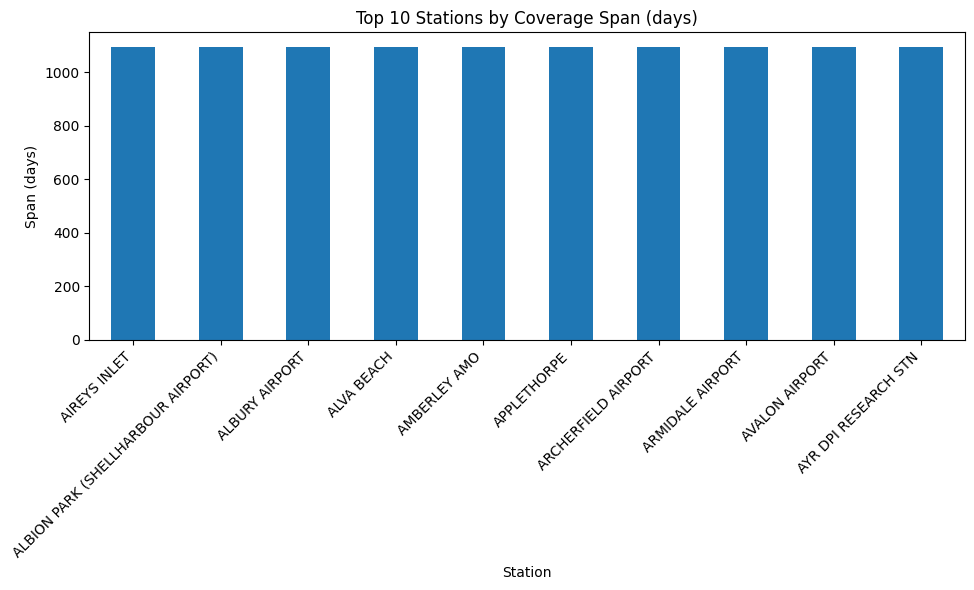

In [113]:
summary = df.groupby('station')['date'].agg(['min','max','nunique'])
summary['span_days'] = (summary['max'] - summary['min']).dt.days
top10    = summary.nlargest(10, 'span_days')
bottom10 = summary.nsmallest(10, 'span_days')


fig, ax = plt.subplots(figsize=(10, 6))
top10['span_days'].plot(
    kind='bar', ax=ax
)
ax.set_title('Top 10 Stations by Coverage Span (days)')
ax.set_xlabel('Station')
ax.set_ylabel('Span (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

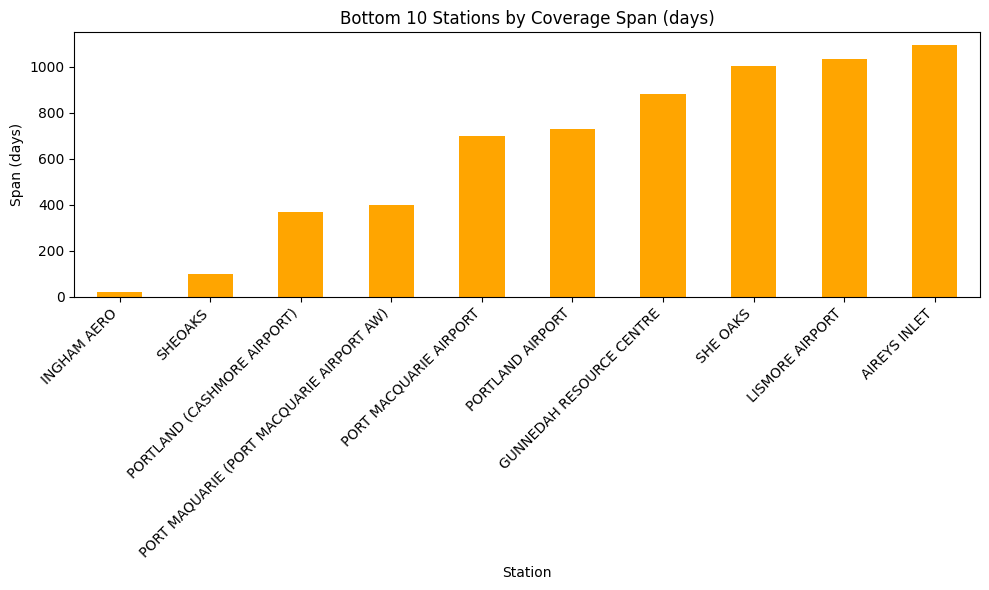

In [114]:
fig, ax = plt.subplots(figsize=(10, 6))
bottom10['span_days'].plot(
    kind='bar', ax=ax, color='orange'
)
ax.set_title('Bottom 10 Stations by Coverage Span (days)')
ax.set_xlabel('Station')
ax.set_ylabel('Span (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [109]:
bad = df[
    (df.min_Temperature_C < -20) | (df.min_Temperature_C > 60) |
    (df.max_Temperature_C < -20) | (df.max_Temperature_C > 60) | 
    (df.max_Humidity_pct < 0) | (df.max_Humidity_pct > 100) |
    (df.min_Humidity_pct < 0) | (df.min_Humidity_pct > 100) |
    (df.wind_speed_m_s < 0)
]
print("number of bad data:", len(bad))

number of bad data: 0


In [116]:
# 
df = pd.read_csv('E:/study/meteoroData_clean/all_states_weather_v3.csv', parse_dates=['date'])
# Cell 3: 中心趋势：整体 & 按州分组
key_vars = ['max_Temperature_C', 'min_Temperature_C', 'max_Humidity_pct', 'min_Humidity_pct', 'wind_speed_m_s']

# 整体均值、中位数
desc_all = df[key_vars].agg(['mean','median']).T
print("Overall mean & median:\n", desc_all)

# 按 state 分组的均值
desc_by_state = df.groupby('state')[key_vars].agg(['mean','median'])
print("\nBy-state mean & median:\n", desc_by_state)

Overall mean & median:
                         mean     median
max_Temperature_C  24.259339  24.500000
min_Temperature_C  12.834982  12.866308
max_Humidity_pct   89.725099  95.000000
min_Humidity_pct   47.472851  48.000000
wind_speed_m_s      3.561740   3.240000

By-state mean & median:
       max_Temperature_C        min_Temperature_C        max_Humidity_pct  \
                   mean median              mean median             mean   
state                                                                      
NSW           23.142834   22.8         11.106531   11.4        89.994918   
QLD           28.932174   29.1         17.531007   18.6        87.175337   
VIC           19.671586   18.7          9.066675    9.1        92.696632   

             min_Humidity_pct        wind_speed_m_s         
      median             mean median           mean median  
state                                                       
NSW     95.0        45.869585   46.0       3.396404   3.11  
QLD     9

In [117]:
var_all = df[key_vars].agg(['std', lambda x: x.quantile(0.75)-x.quantile(0.25)]).T
var_all.rename(columns={'<lambda_0>':'IQR'}, inplace=True)
print("Overall variability:\n", var_all)

# 按月
df['month'] = df['date'].dt.month
var_by_month = df.groupby('month')[key_vars].agg(['mean','std'])
print("\nMonthly mean & std:\n", var_by_month)

Overall variability:
                          std  <lambda>
max_Temperature_C   7.544637     11.00
min_Temperature_C   7.016153     10.60
max_Humidity_pct   13.529633     12.00
min_Humidity_pct   19.342599     28.00
wind_speed_m_s      2.018314      2.34

Monthly mean & std:
       max_Temperature_C           min_Temperature_C            \
                   mean       std              mean       std   
month                                                           
1             29.935176  5.835657         18.473691  5.053894   
2             29.730025  5.494770         17.991257  5.209446   
3             28.318409  5.601411         17.269738  5.264219   
4             24.279761  5.529440         13.315123  5.574077   
5             20.417260  5.787582          9.837735  6.247998   
6             17.975166  6.406187          7.350598  5.755352   
7             17.455600  5.912538          6.886546  5.711197   
8             20.182811  6.337920          8.361602  5.533582   
9      